### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({"text.usetex": False})
from sklearn.linear_model import Lasso 

### Data loading

In [2]:
A_data = np.loadtxt('../data/ala2/ala2_stateA.dat')[:,1:] #Ignoring time
B_data = np.loadtxt('../data/ala2/ala2_stateB.dat')[:,1:] #Ignoring time
with open('../data/ala2/ala2_stateA.dat', 'r') as f:
    header = f.readline()
columns = header[2:-1].split(' ')[1:] # Ignore comment symbol and \n at the end

In [3]:
A_data.shape

(10000, 77)

### Dataset preparation

In [4]:
X_data = np.vstack([A_data, B_data]) 
Y_data = np.hstack([
    np.ones(A_data.shape[0]),
    -np.ones(B_data.shape[0])
])
perm = np.random.permutation(Y_data.shape[0])
#Shuffling
X_data = X_data[perm]
Y_data = Y_data[perm]

### Model training

In [5]:
alpha = 0.1 #Adjusting this changes the number of selected features (low α = high number of features)
model = Lasso(alpha=alpha)

In [6]:
model.fit(X_data,Y_data)

Lasso(alpha=0.1)

In [7]:
print("The relevant features are:")
w_norm = np.linalg.norm(model.sparse_coef_.data)
for idx in model.sparse_coef_.indices:
    coeff = np.around(model.sparse_coef_[0,idx], decimals = 3)
    weight = np.around(coeff**2/w_norm**2, decimals = 3)
    print(f"{columns[idx]} with coefficient {coeff} and relative weight {weight}")

The relevant features are:
dih_sin1 with coefficient -0.623 and relative weight 0.675
dih_sin5 with coefficient 0.432 and relative weight 0.325


### Model testing

In [23]:
model_idxs = model.sparse_coef_.indices
A_data_light = A_data[:,model_idxs]
B_data_light = B_data[:,model_idxs]

boundary_x = np.linspace(-1,1,2)
boundary_y = -np.linspace(-1,1,2)* model.sparse_coef_[0,model_idxs[0]]/model.sparse_coef_[0,model_idxs[1]]

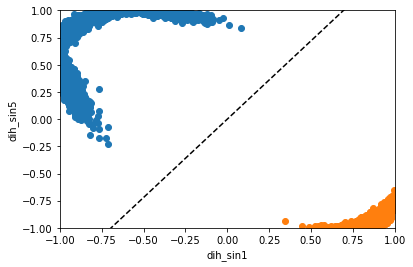

In [24]:
fig, ax = plt.subplots()
ax.set_xlabel(columns[model_idxs[0]])
ax.set_ylabel(columns[model_idxs[1]])
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.scatter(A_data_light[:,0], A_data_light[:,1])
ax.scatter(B_data_light[:,0], B_data_light[:,1])
ax.plot(boundary_x, boundary_y, 'k--')